In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv


# Load Data

In [2]:
path = "/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv"
df = pd.read_csv(path)

## Some Sample

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## Shape

In [4]:
df.shape

(2149, 35)

# Basic Stats

## Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientID,2149.0,NaN,NaN,NaN,5825.0,620.507185,4751.0,5288.0,5825.0,6362.0,6899.0
Age,2149.0,NaN,NaN,NaN,74.908795,8.990221,60.0,67.0,75.0,83.0,90.0
Gender,2149.0,NaN,NaN,NaN,0.506282,0.500077,0.0,0.0,1.0,1.0,1.0
Ethnicity,2149.0,NaN,NaN,NaN,0.697534,0.996128,0.0,0.0,0.0,1.0,3.0
EducationLevel,2149.0,NaN,NaN,NaN,1.286645,0.904527,0.0,1.0,1.0,2.0,3.0
BMI,2149.0,NaN,NaN,NaN,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,NaN,NaN,NaN,0.288506,0.453173,0.0,0.0,0.0,1.0,1.0
AlcoholConsumption,2149.0,NaN,NaN,NaN,10.039442,5.75791,0.002003,5.13981,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,NaN,NaN,NaN,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,NaN,NaN,NaN,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


## Distributions

array([[<Axes: title={'center': 'PatientID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>,
        <Axes: title={'center': 'EducationLevel'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'AlcoholConsumption'}>,
        <Axes: title={'center': 'PhysicalActivity'}>,
        <Axes: title={'center': 'DietQuality'}>,
        <Axes: title={'center': 'SleepQuality'}>,
        <Axes: title={'center': 'FamilyHistoryAlzheimers'}>],
       [<Axes: title={'center': 'CardiovascularDisease'}>,
        <Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Depression'}>,
        <Axes: title={'center': 'HeadInjury'}>,
        <Axes: title={'center': 'Hypertension'}>,
        <Axes: title={'center': 'SystolicBP'}>],
       [<Axes: title={'center': 'DiastolicBP'}>,
        <Axes: title={'center': 'CholesterolTotal'}>,
        

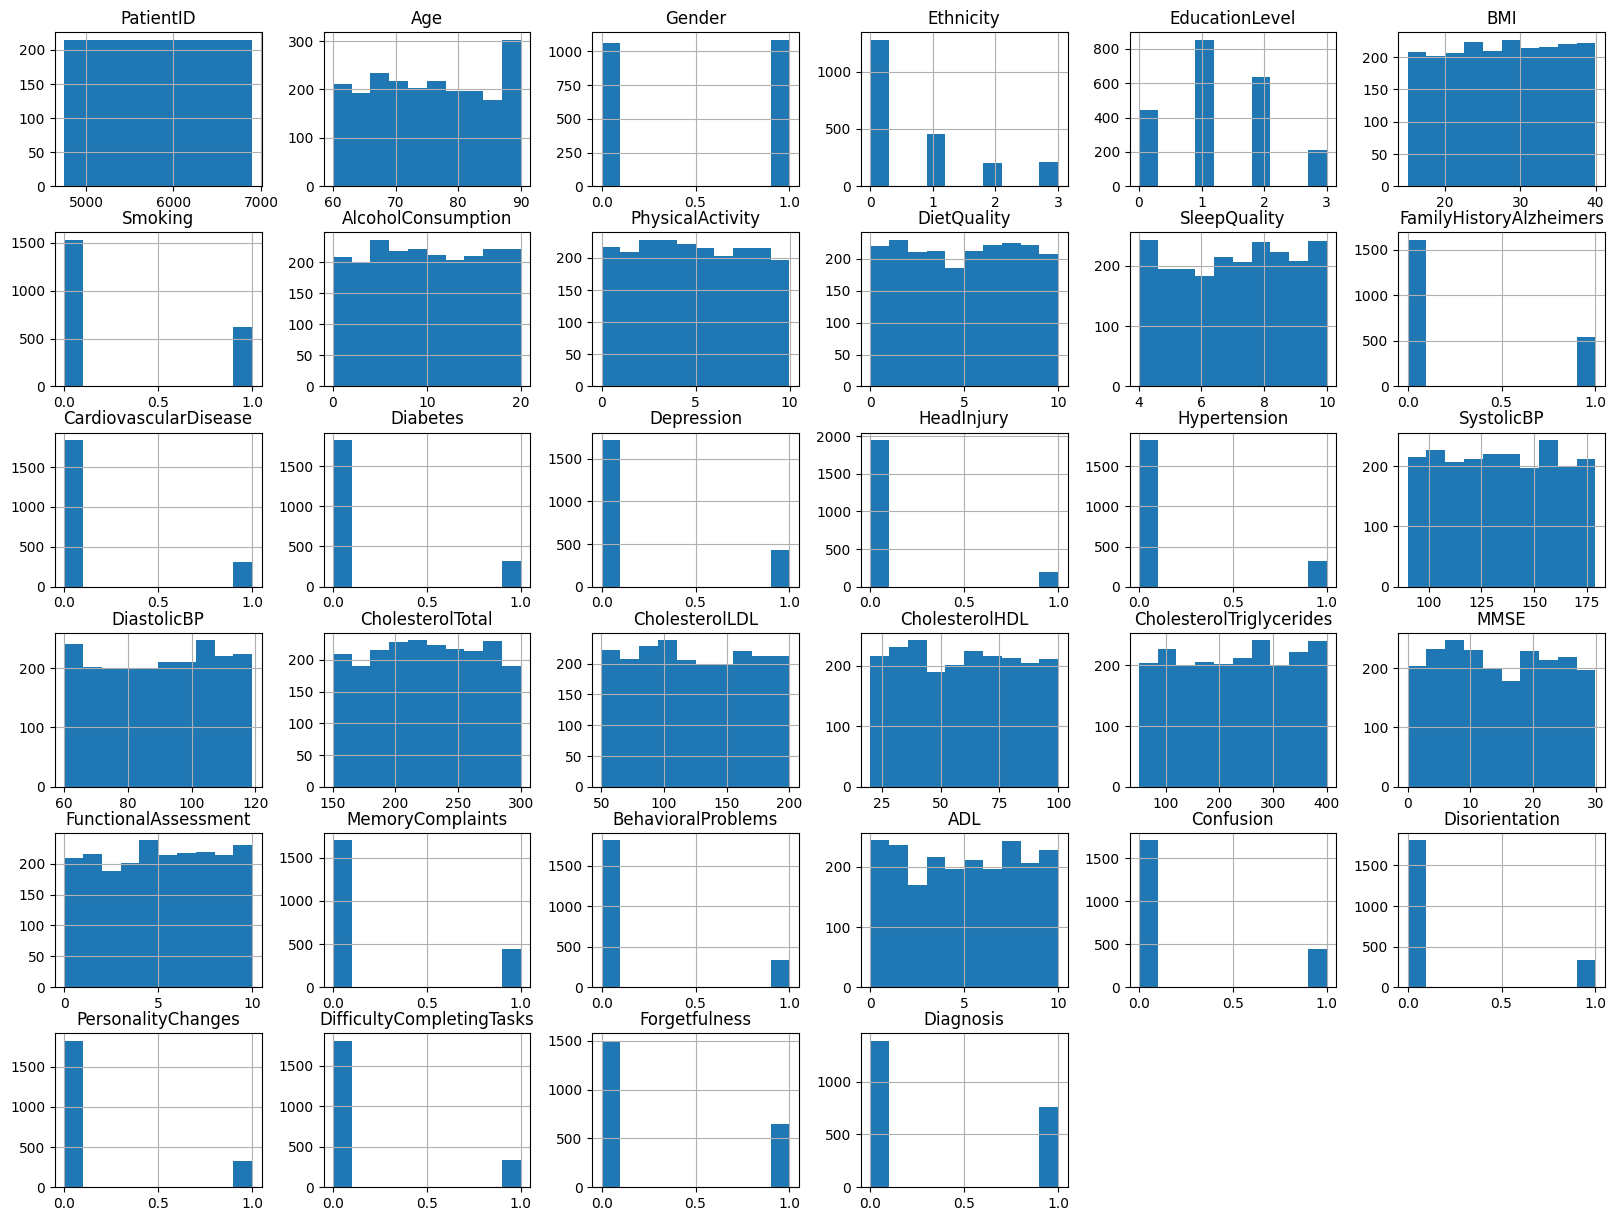

In [7]:
df.hist(figsize=(20, 15))

# Missing Values

In [8]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

# Unique Values

In [9]:
for column in df.columns:
    print(f"{column}")
    print('-' * 45)
    print(df[column].unique())
    print()

PatientID
---------------------------------------------
[4751 4752 4753 ... 6897 6898 6899]

Age
---------------------------------------------
[73 89 74 86 68 75 72 87 78 84 64 69 63 65 82 77 71 83 79 67 66 70 85 60
 88 62 81 61 80 90 76]

Gender
---------------------------------------------
[0 1]

Ethnicity
---------------------------------------------
[0 3 1 2]

EducationLevel
---------------------------------------------
[2 0 1 3]

BMI
---------------------------------------------
[22.92774923 26.82768119 17.79588244 ... 15.47647896 15.29991122
 33.28973831]

Smoking
---------------------------------------------
[0 1]

AlcoholConsumption
---------------------------------------------
[13.29721773  4.54252382 19.55508453 ...  4.59467018  8.67450518
  7.89070315]

PhysicalActivity
---------------------------------------------
[6.32711247 7.61988454 7.84498779 ... 9.88600229 6.35428175 6.57099338]

DietQuality
---------------------------------------------
[1.34721431 0.51876714 1.826334

# Profile Report

In [10]:
# ProfileReport(df)

# Dropping Unnecessary Columns

In [11]:
df = df.drop(['DoctorInCharge', 'PatientID'], axis=1)

In [12]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


# Outliers

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


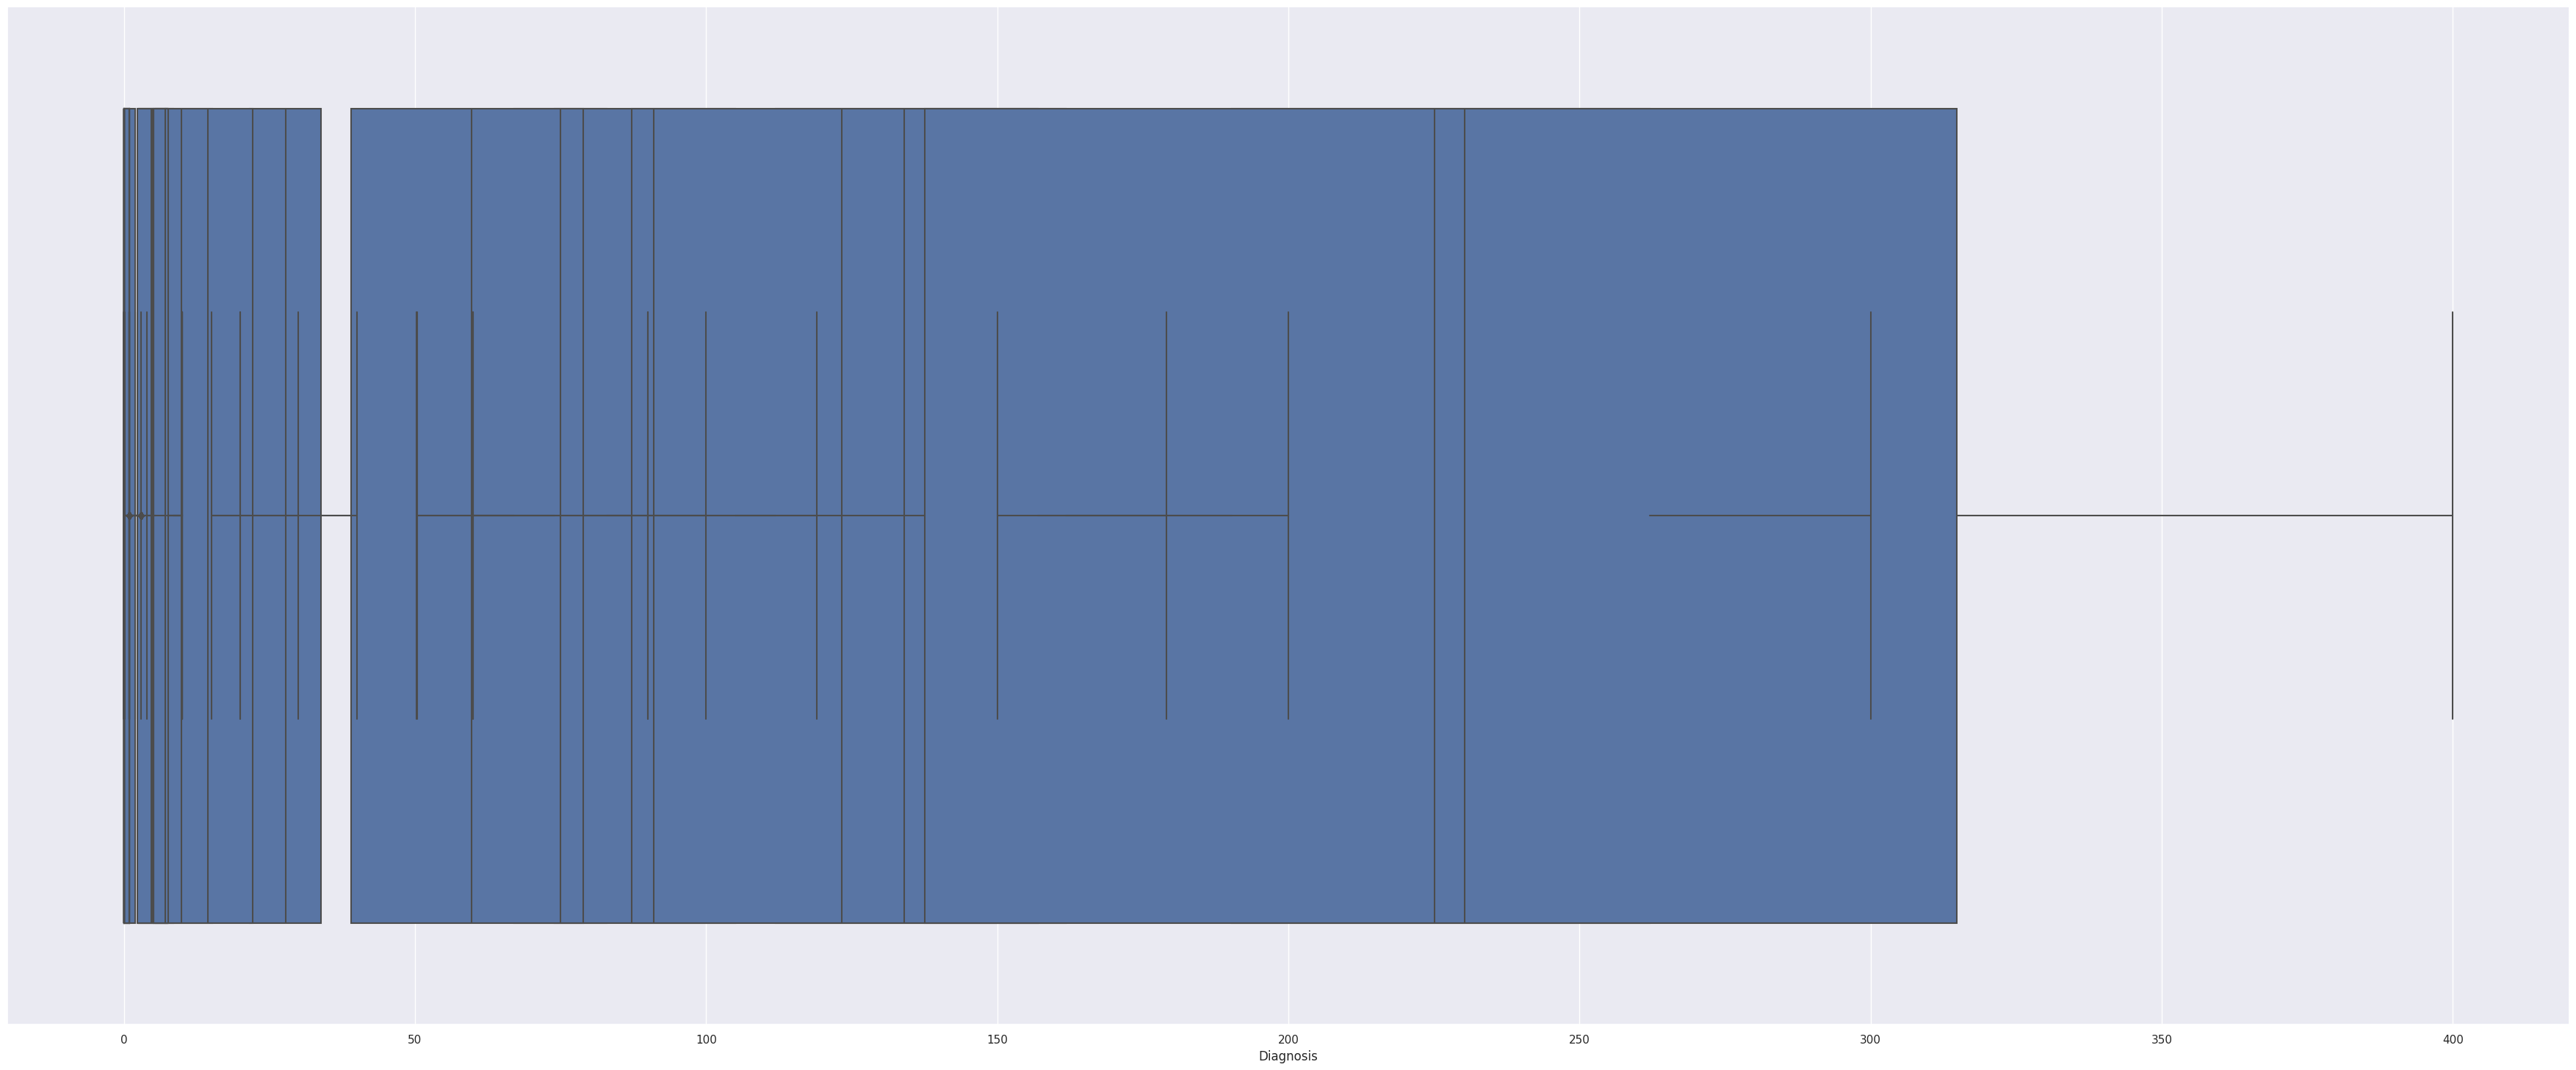

In [13]:
sns.set(rc={"figure.figsize":(45, 18)})
for column in df.columns:
    print(sns.boxplot(x=df[column]))

# Data Preparation for Model Training

## Feature Selection

In [14]:
df = df.drop([
    'Ethnicity', 'EducationLevel', 'DietQuality',
    'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
    'ADL',
], axis=1)

## Split Data

In [15]:
features = df.drop(['Diagnosis'], axis=1)
label = df['Diagnosis']

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(
    features, label, test_size=.2, random_state=42, stratify=label
)

# ANN with Imbalanced Data

In [17]:
xtrain.shape

(1719, 22)

<Axes: >

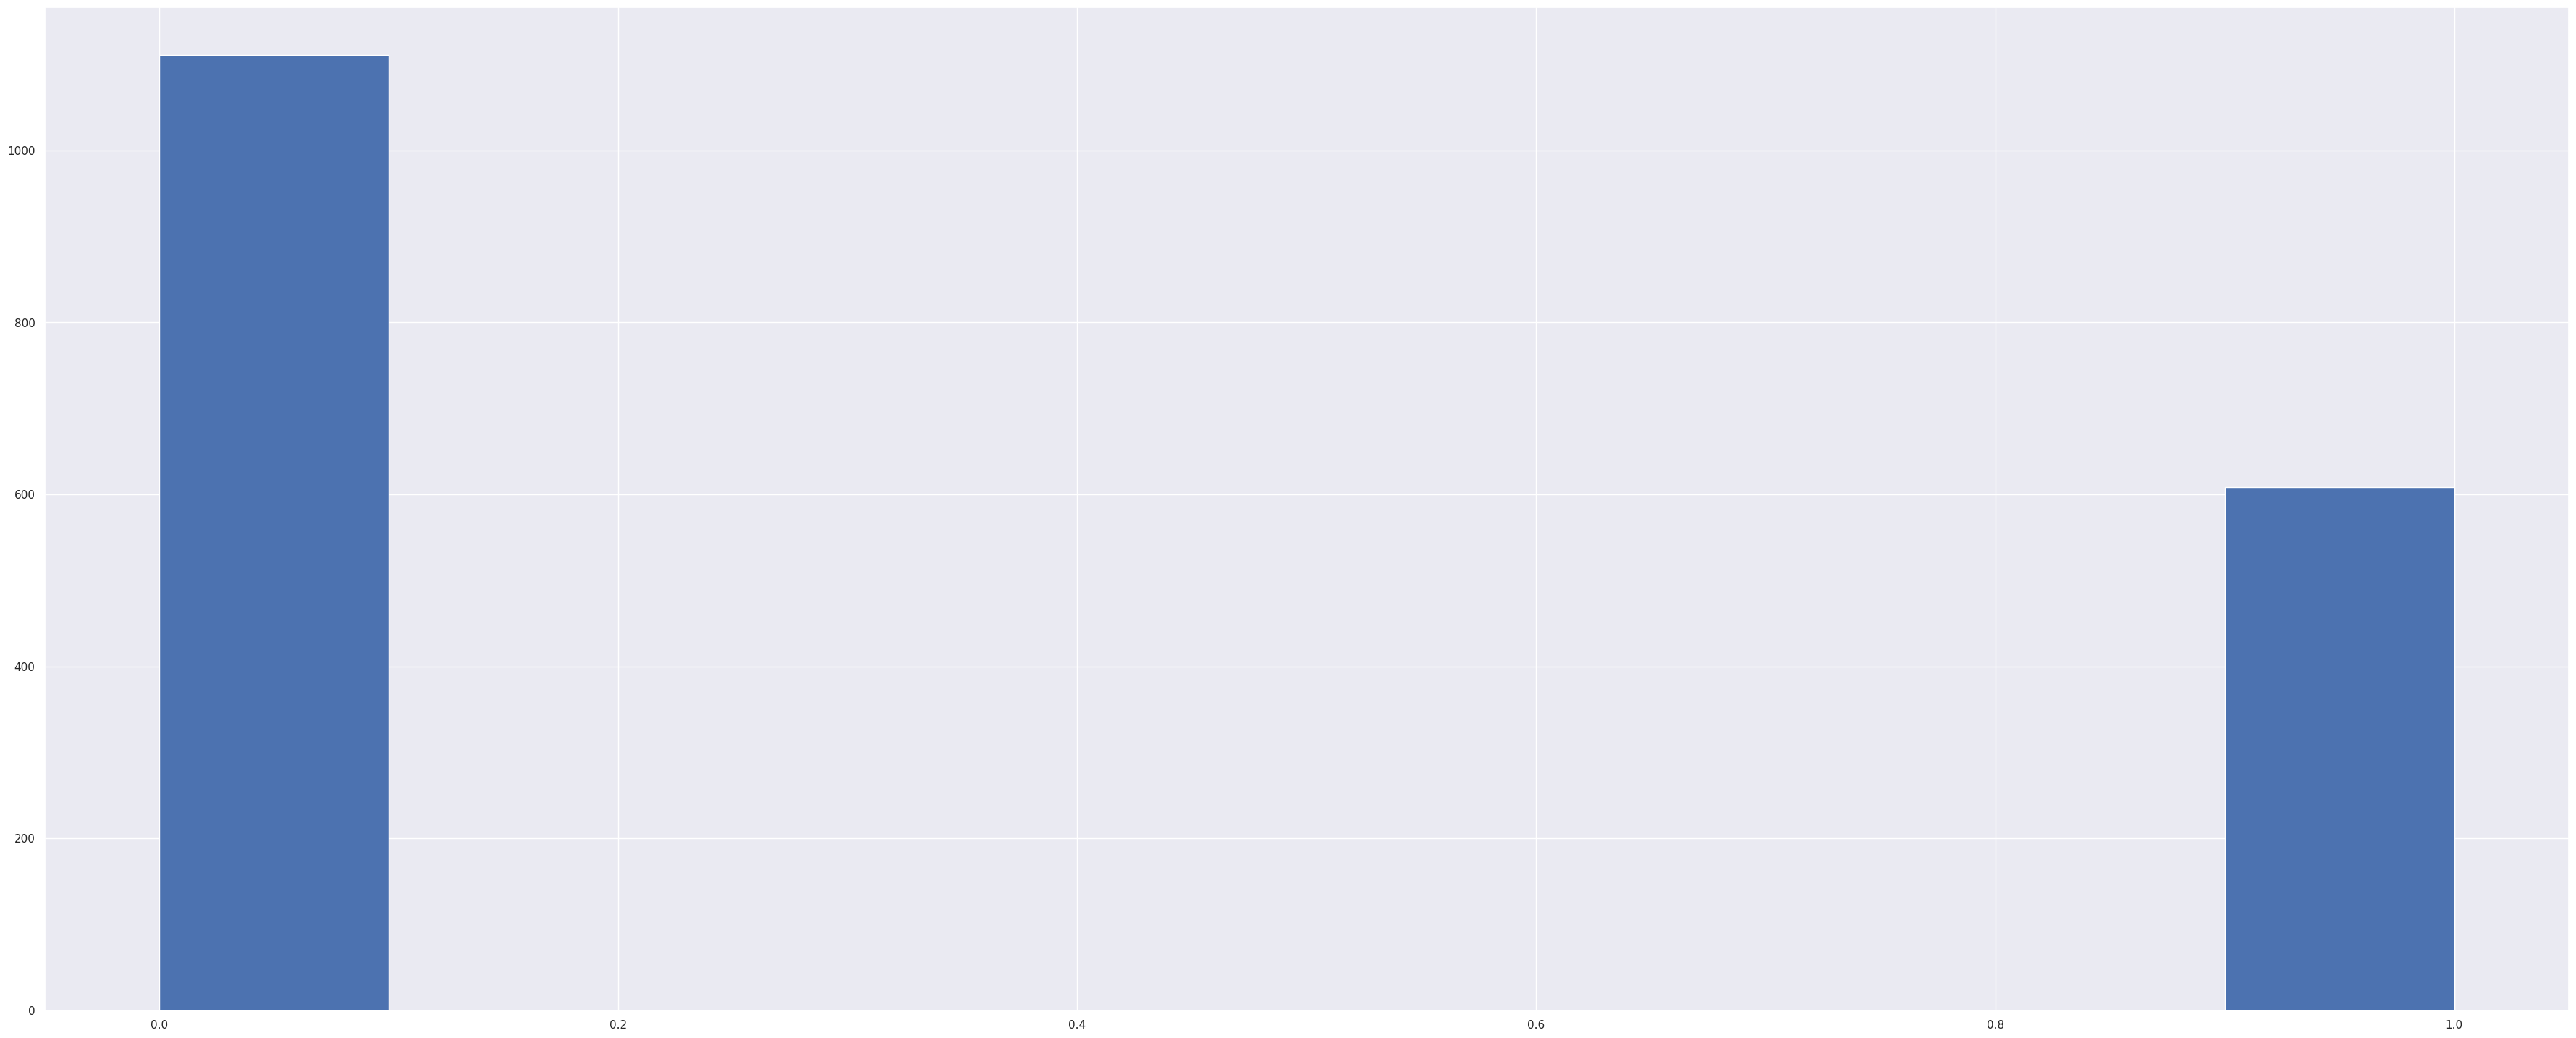

In [18]:
ytrain.hist()

In [19]:
imbal_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(xtrain.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
imbal_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
imbal_model.fit(xtrain, ytrain, epochs=50, validation_data=(xtest, ytest))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5933 - loss: 1.0576 - val_accuracy: 0.7465 - val_loss: 0.5394
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7082 - loss: 0.5651 - val_accuracy: 0.7000 - val_loss: 0.5326
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7416 - loss: 0.5243 - val_accuracy: 0.7698 - val_loss: 0.4872
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7492 - loss: 0.5080 - val_accuracy: 0.7674 - val_loss: 0.5004
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7726 - loss: 0.4961 - val_accuracy: 0.7116 - val_loss: 0.5217
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7562 - loss: 0.4913 - val_accuracy: 0.7767 - val_loss: 0.4528
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7742 - loss: 0.4805 - val_accuracy: 0.7884 - val_loss: 0.4461
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7769 - loss: 0.4757 - val_accuracy: 0.7953 - val_loss: 0.4454
Epo

## Accuracy

In [20]:
imbal_model.evaluate(xtest, ytest, verbose=2)

14/14 - 0s - 3ms/step - accuracy: 0.8047 - loss: 0.4278


[0.4278211295604706, 0.804651141166687]

In [21]:
ypred = imbal_model.predict(xtest)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [22]:
y_pred = (ypred > .5).astype(int)  # Convert probabilities to binary

In [23]:
accuracy_score(ytest, y_pred)

0.8046511627906977

In [24]:
# Classification report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       278
           1       0.72      0.74      0.73       152

    accuracy                           0.80       430
   macro avg       0.79      0.79      0.79       430
weighted avg       0.81      0.80      0.81       430



<Axes: >

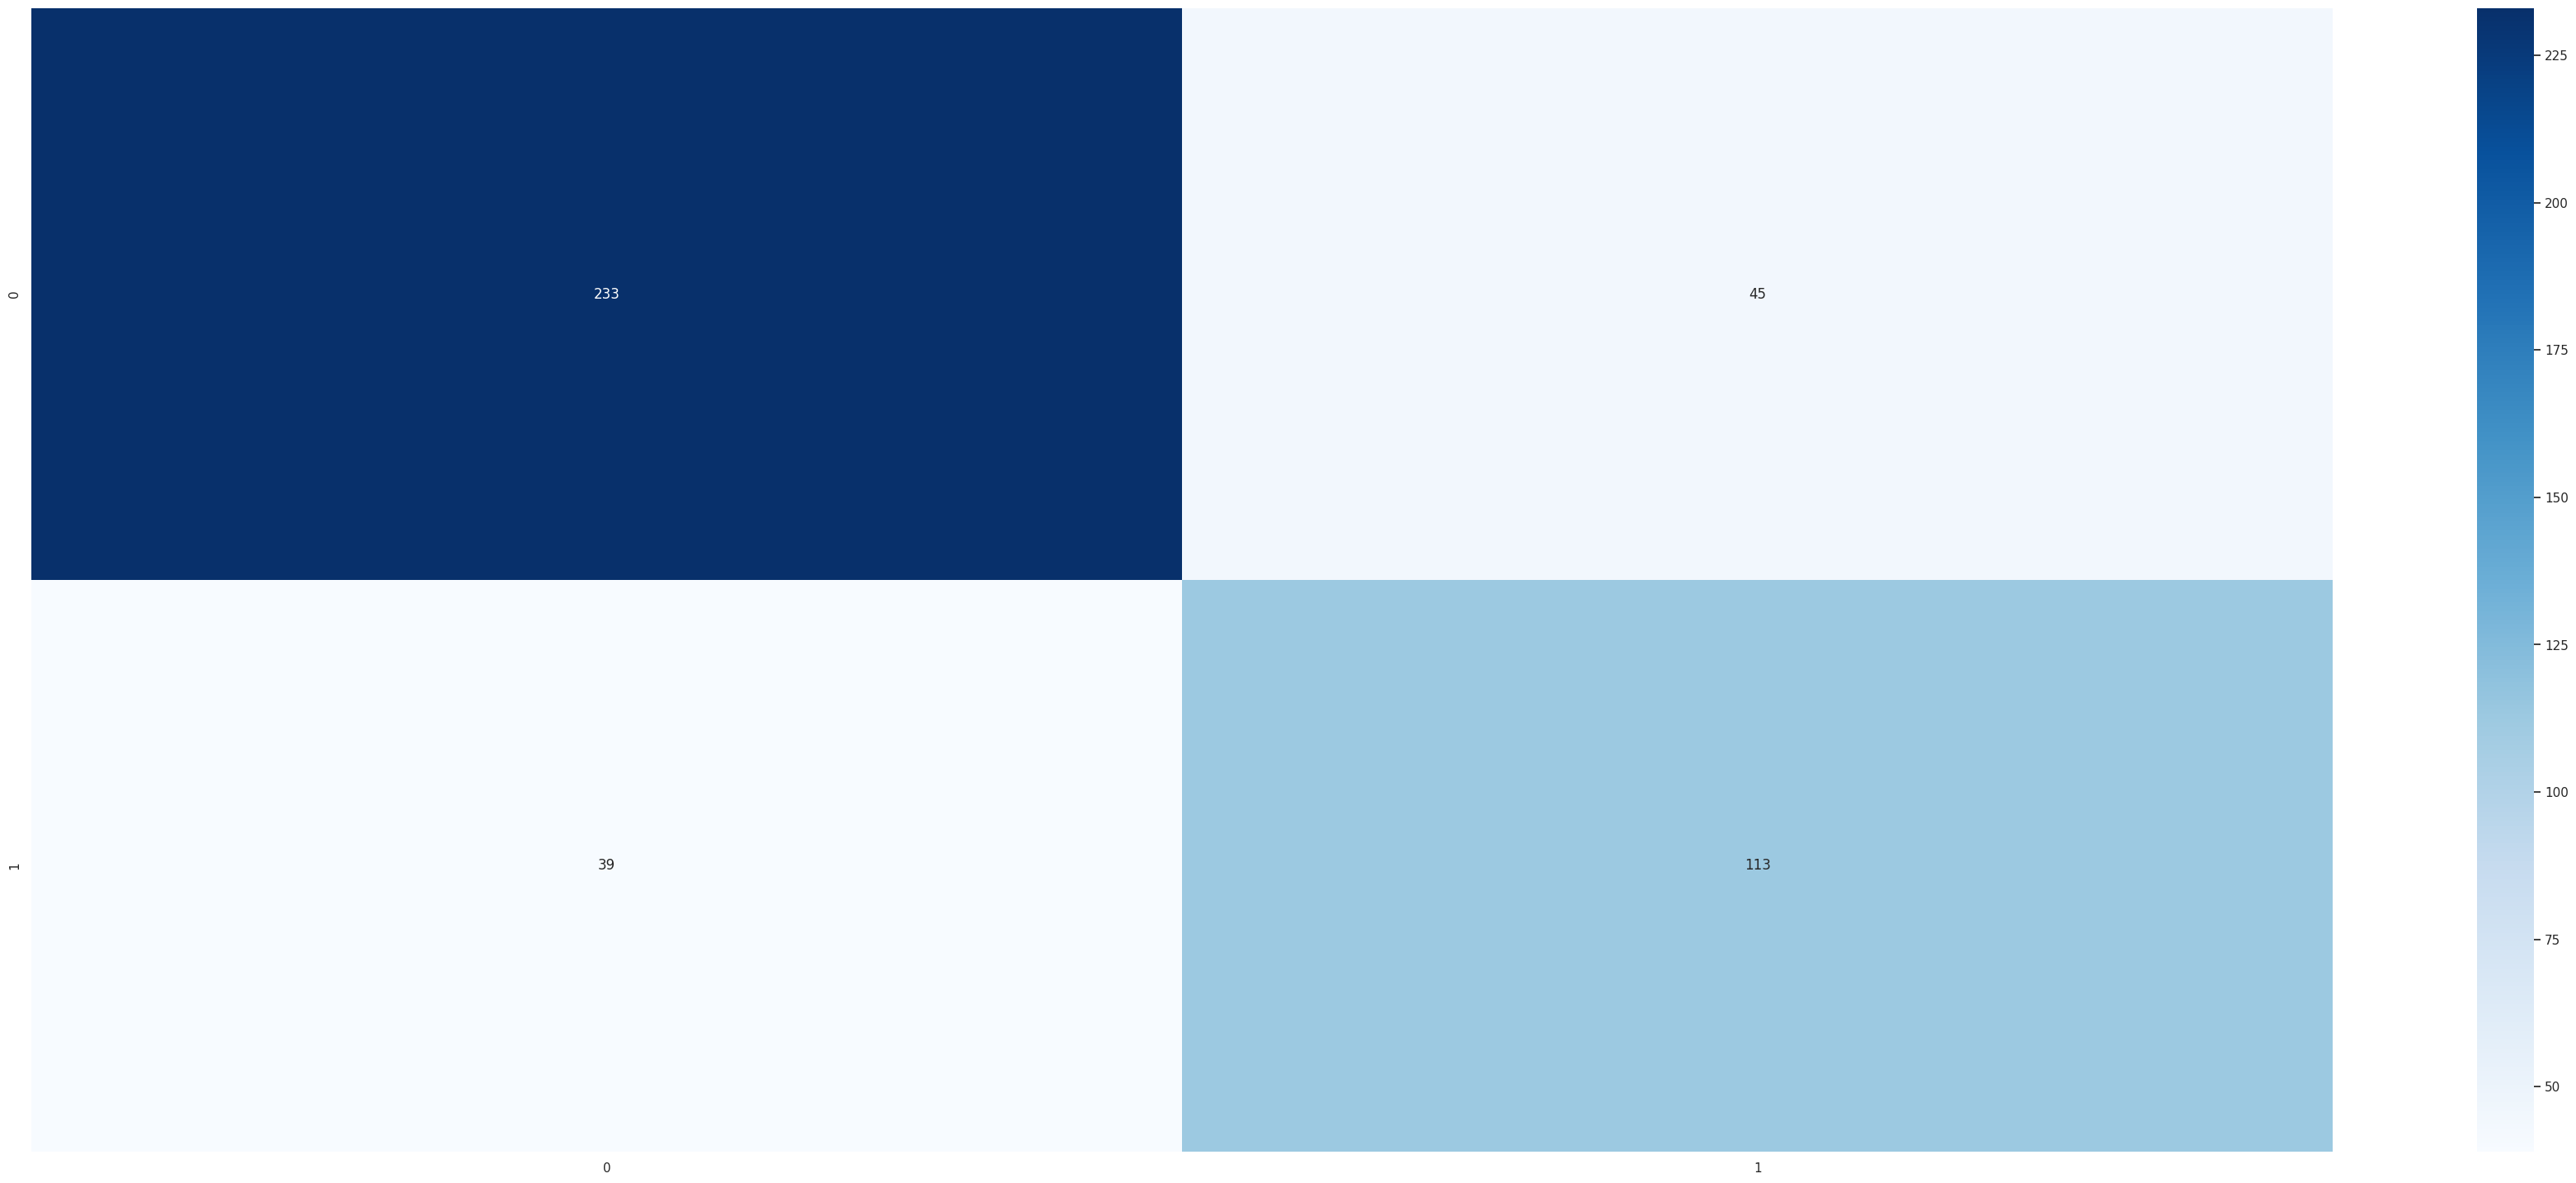

In [25]:
# Confusion matrix
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# ANN Balanced Model

In [26]:
negative_class = df[df['Diagnosis'] == 0]
positive_class = df[df['Diagnosis'] == 1]

In [27]:
negative_class.shape

(1389, 23)

In [28]:
positive_class.shape

(760, 23)

## Undersampled Training Data

In [29]:
undersampled_negative = negative_class.sample(positive_class.shape[0])
undersampled_df = pd.concat([undersampled_negative, positive_class], axis=0)

In [30]:
undersampled_df.head()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
1757,65,0,28.761052,0,2.481086,1.086429,7.154911,0,0,1,...,3.002978,5.217427,0,0,0,0,1,0,0,0
1435,65,0,28.706150,0,0.958032,9.163547,6.313219,1,0,0,...,26.003327,8.843941,1,0,0,1,0,0,0,0
1402,67,1,27.790551,0,19.029173,5.284802,4.736468,0,0,0,...,22.777818,0.658424,0,0,1,0,0,0,1,0
5,86,1,30.626886,0,4.140144,0.211062,7.261953,0,0,1,...,27.517529,5.510144,0,0,1,0,0,0,0,0
928,71,1,15.008851,0,3.169215,5.863132,7.614766,1,0,0,...,27.869324,6.426549,0,1,1,0,0,1,0,0


In [31]:
ufeatures = undersampled_df.drop(['Diagnosis'], axis=1)
ulabel = undersampled_df['Diagnosis']
xtrain, xtest, ytrain, ytest = train_test_split(ufeatures, ulabel, test_size=0.2, random_state=42, stratify=ulabel)

In [32]:
undersampled_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(xtrain.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
undersampled_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
undersampled_model.fit(xtrain, ytrain, epochs=50, validation_data=(xtest, ytest))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4975 - loss: 1.2499 - val_accuracy: 0.5132 - val_loss: 0.8721
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5826 - loss: 0.7017 - val_accuracy: 0.7171 - val_loss: 0.5809
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.5626 - val_accuracy: 0.7763 - val_loss: 0.5669
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7329 - loss: 0.5467 - val_accuracy: 0.7204 - val_loss: 0.5504
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7464 - loss: 0.5280 - val_accuracy: 0.7730 - val_loss: 0.5193
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7464 - loss: 0.5152 - val_accuracy: 0.7072 - val_loss: 0.5668
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7387 - loss: 0.4995 - val_accuracy: 0.7730 - val_loss: 0.5046
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7723 - loss: 0.4787 - val_accuracy: 0.7895 - val_loss: 0.5021
Epo

## Accuracy

In [33]:
undersampled_model.evaluate(xtest, ytest, verbose=2)

10/10 - 0s - 3ms/step - accuracy: 0.7566 - loss: 0.5379


[0.5379422903060913, 0.7565789222717285]

In [34]:
ypred = imbal_model.predict(xtest)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [35]:
y_pred = (ypred > .5).astype(int)  # Convert probabilities to binary

In [36]:
accuracy_score(ytest, y_pred)

0.8322368421052632

In [37]:
# Classification report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       152
           1       0.88      0.77      0.82       152

    accuracy                           0.83       304
   macro avg       0.84      0.83      0.83       304
weighted avg       0.84      0.83      0.83       304



<Axes: >

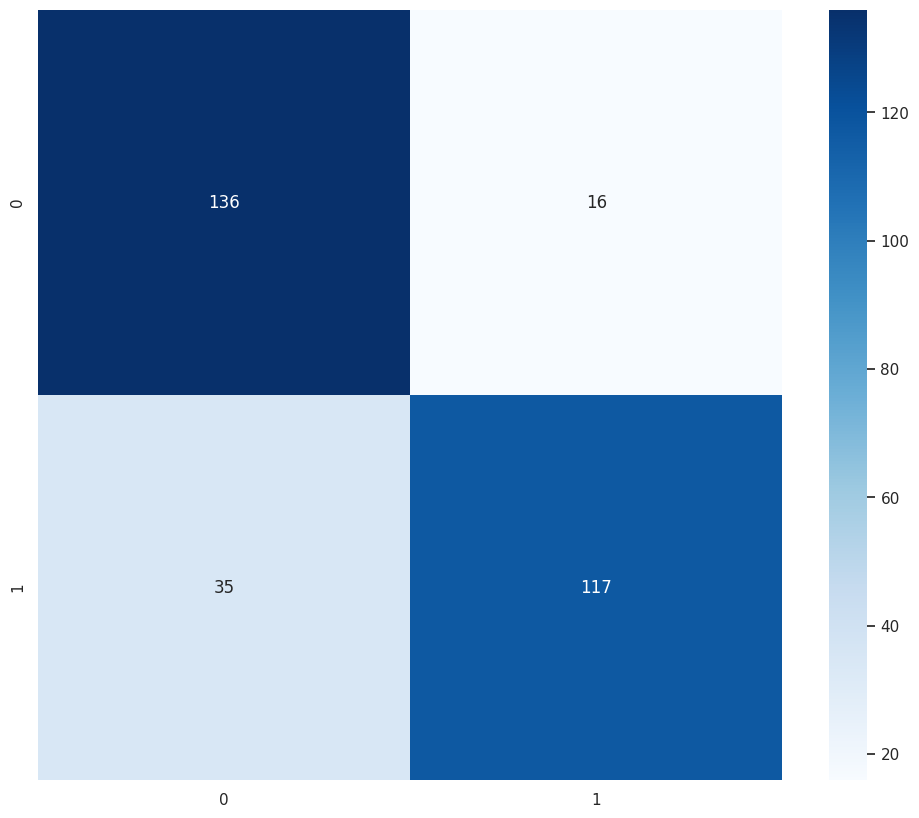

In [38]:
# Confusion matrix
sns.set(rc={"figure.figsize":(12, 10)})
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")